In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv("data/HistoricalData_1735516500879.csv")
columns = ["Close/Last", "Open", "High", "Low", "Date"]
df = df[columns]
df = df[::-1]
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.head()

,Close/Last,Open,High,Low
Date,,,,
2024-03-07,67072.9,65862.1,67270.9,66787.8
2024-03-08,68289.5,67152.1,68343.7,67923.9
2024-03-09,69484.5,68298.6,69676.4,68250.3
2024-03-10,68506.2,69169.7,68966.1,67452.8
2024-03-11,71670.1,68600.2,72467.1,71519.9


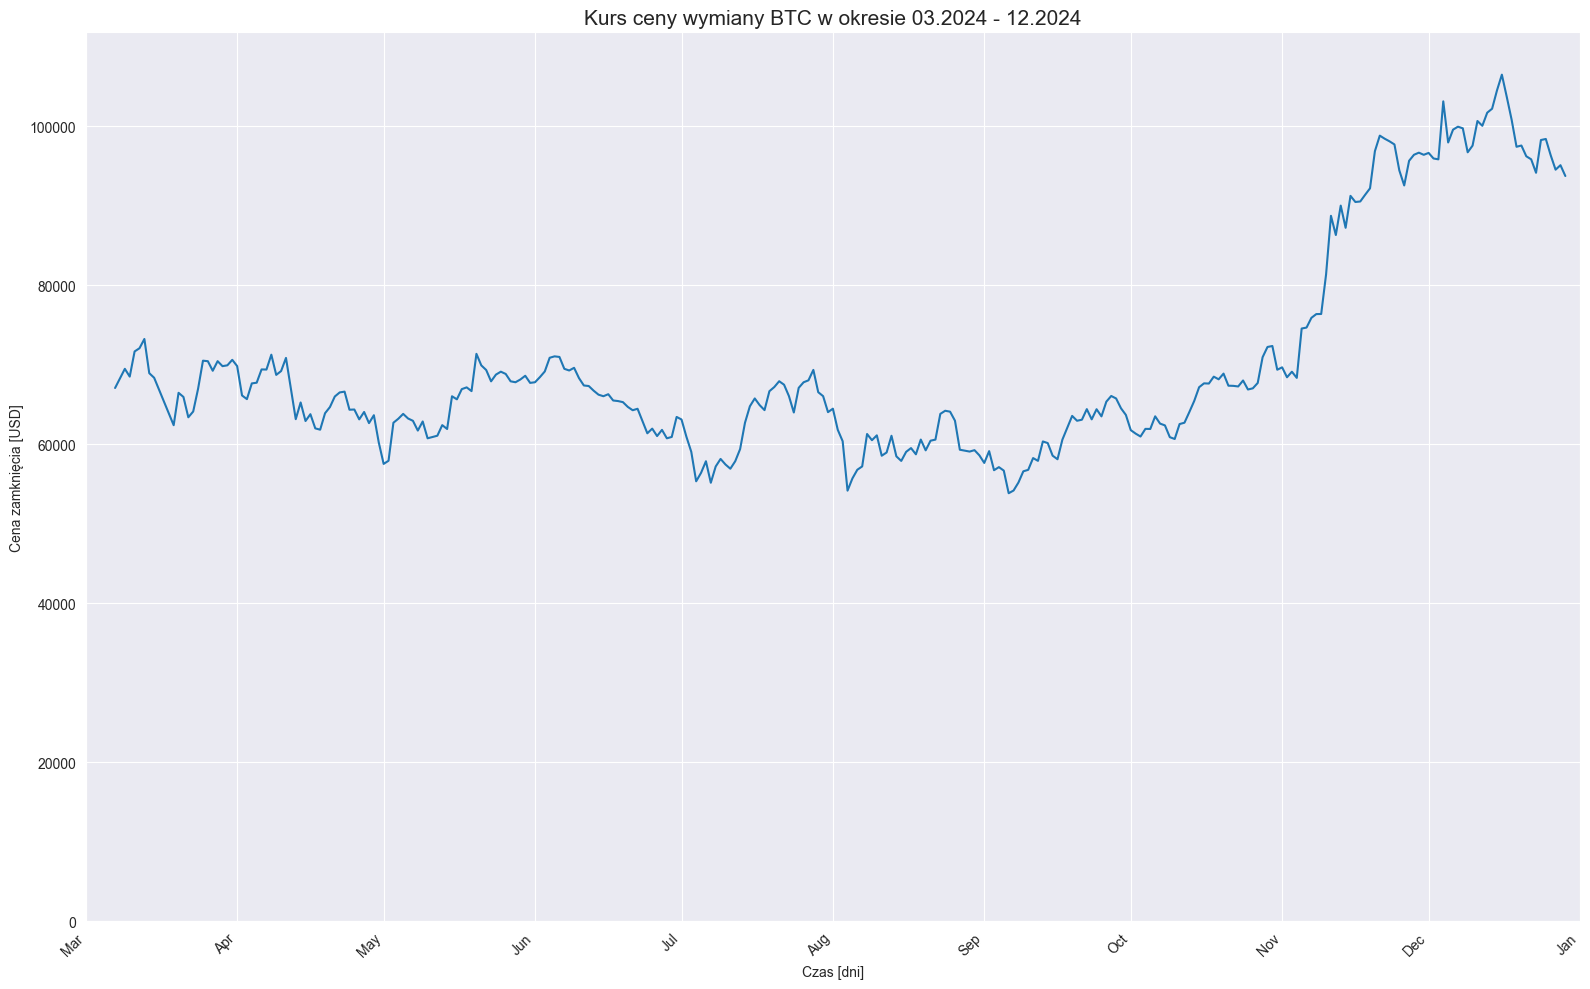

In [4]:
# Plot the data
fig, ax = plt.subplots(figsize=(16, 10))
df["Close/Last"].plot(ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.set_xlim(pd.Timestamp("2024-03-01"), pd.Timestamp("2025-01-01"))
ax.set_ylim(0, df["Close/Last"].max() * 1.05)

# Customize plot
plt.title('Kurs ceny wymiany BTC w okresie 03.2024 - 12.2024', fontsize=15)
plt.xlabel('Czas [dni]')
plt.ylabel('Cena zamknięcia [USD]')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [5]:
# Calculate diffs between high and low
df["diff_close/open"] = df["Close/Last"] - df["Open"]
df["diff_high/low"] = df["High"] - df["Low"]


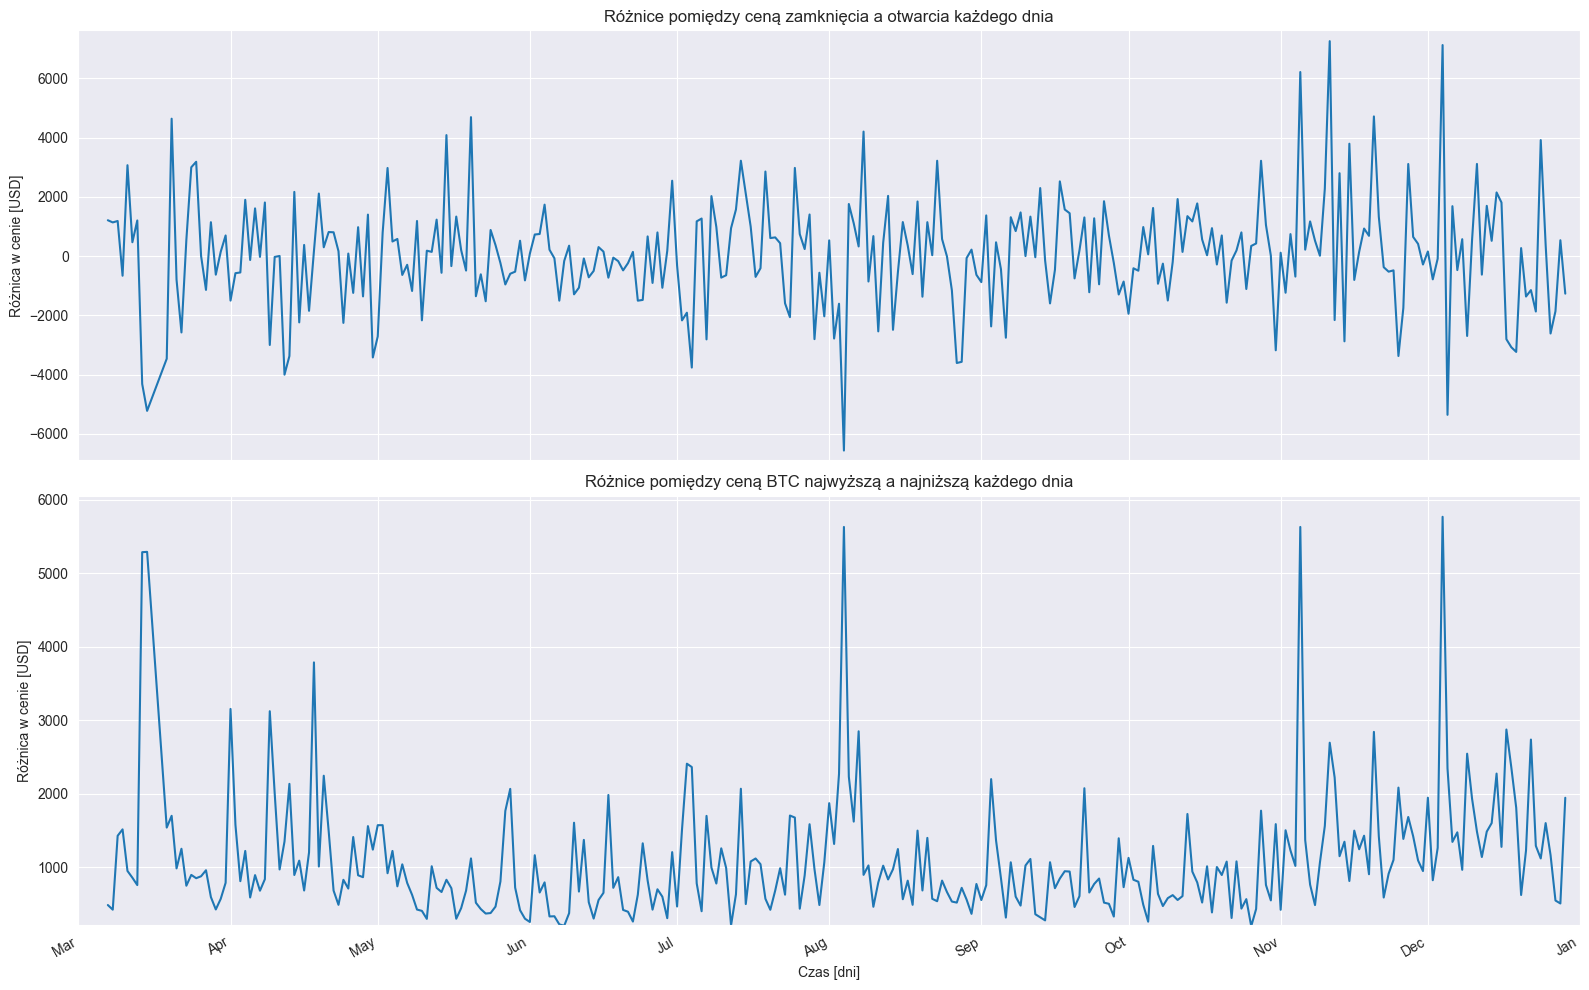

In [6]:
# Plot Price and Volume
fig, ax = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

df["diff_close/open"].plot(ax=ax[0], title="Różnice pomiędzy ceną zamknięcia a otwarcia każdego dnia")

ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax[0].set_xlim(pd.Timestamp("2024-03-01"), pd.Timestamp("2025-01-01"))
ax[0].set_ylim(df["diff_close/open"].min() * 1.05, df["diff_close/open"].max() * 1.05)

ax[0].set_ylabel("Różnica w cenie [USD]")
ax[0].set_xlabel("Czas [dni]")
ax[0].grid(True)
# ax[0].legend()

# Plot Volume
df["diff_high/low"].plot(ax=ax[1], title="Różnice pomiędzy ceną BTC najwyższą a najniższą każdego dnia")

ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax[1].set_xlim(pd.Timestamp("2024-03-01"), pd.Timestamp("2025-01-01"))
ax[1].set_ylim(df["diff_high/low"].min() * 1.05, df["diff_high/low"].max() * 1.05)

ax[1].set_ylabel("Różnica w cenie [USD]")
ax[1].set_xlabel("Czas [dni]")
ax[1].grid(True)
# ax[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [7]:
print("Podstawowe statystyki opisowe:")
 
print(str(df.describe()).replace(".", ","))

Podstawowe statystyki opisowe:
          Close/Last           Open           High            Low  \
count     295,000000     295,000000     295,000000     295,000000   
mean    69814,484407   69763,589492   70344,472881   69242,193898   
std     12818,300699   12775,691169   12901,514200   12691,334698   
min     53836,600000   52865,600000   54066,600000   52659,800000   
25%     61918,400000   61873,950000   62188,450000   61254,750000   
50%     66054,500000   65984,600000   66395,500000   65764,300000   
75%     69824,450000   69849,800000   70658,600000   69452,350000   
max    106484,000000  106504,000000  106961,000000  105686,000000   

       diff_close/open  diff_high/low  
count       295,000000     295,000000  
mean         50,894915    1102,278983  
std        1865,649844     842,557513  
min       -6568,800000     194,900000  
25%        -869,750000     572,500000  
50%         113,600000     888,200000  
75%        1023,600000    1368,800000  
max        7260,200000    5

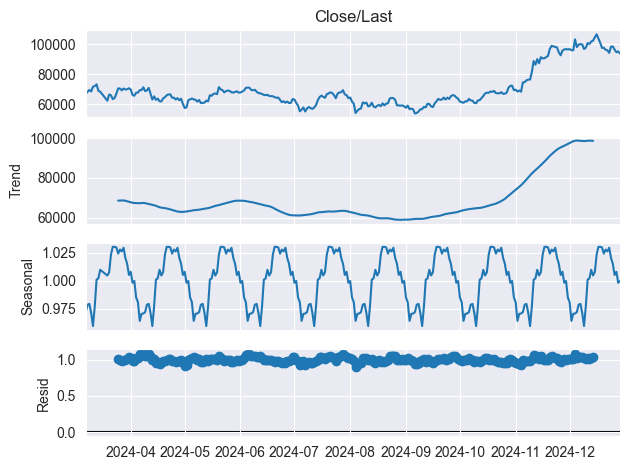

In [8]:
result = seasonal_decompose(df['Close/Last'], model='multiplicative', period=30)  # Przyjmijmy, że dane miesięczne

# Wizualizacja składników
result.plot()
plt.show()

Wnioski z wykresu przedstawiającego dekompozycję szeregu czasowego dla kursu Bitcoina można podzielić na kilka części:

1. Oryginalny szereg czasowy ("Close/Last")
Widać, że kurs Bitcoina w analizowanym okresie (03.2024 - 12.2024) charakteryzuje się dużą zmiennością.
Ogólny trend wskazuje na wzrostowy charakter danych, szczególnie w drugiej połowie roku, co może być związane z rynkowymi wydarzeniami lub czynnikami makroekonomicznymi.
Występują krótkoterminowe fluktuacje w danych, które mogą być związane z sezonowością lub czynnikami losowymi.
2. Trend
Składnik trendu jest wygładzony i pokazuje ogólny kierunek zmian.
Obserwacje:
Trend pozostaje stabilny od kwietnia do sierpnia 2024 r., ale od września zaczyna dynamicznie rosnąć.
Wskazuje to na długoterminowy wzrost wartości Bitcoina, co może być spowodowane zwiększonym popytem, adopcją kryptowalut, lub innymi czynnikami fundamentalnymi.
Przydatne w analizie strategicznej, np. dla inwestorów długoterminowych.
3. Sezonowość
Składnik sezonowy pokazuje regularne, cykliczne wahania w krótszym okresie czasu.
Obserwacje:
Sezonowość jest wyraźna, z regularnymi wzrostami i spadkami co miesiąc.
Wskazuje na wzorce w danych (np. większa aktywność inwestorów w określonych dniach lub tygodniach), które mogą być związane z cyklami rynkowymi, wydarzeniami gospodarczymi, lub nawet psychologią inwestorów.
Amplituda sezonowości nie zmienia się znacząco, co oznacza, że wpływ sezonowych fluktuacji jest stabilny.
4. Reszty (Resid)
Składnik resztowy to pozostałości po usunięciu trendu i sezonowości. Powinien reprezentować losowy charakter danych.
Obserwacje:
Reszty są relatywnie małe, co sugeruje, że dane są dobrze opisane przez trend i sezonowość.
Nie widać wyraźnych wzorców w resztach, co wskazuje na brak dużych niespodziewanych szoków w analizowanym okresie.
Jeśli reszty są losowe (brak autokorelacji), można uznać model za odpowiedni.
Ogólne Wnioski
Kurs Bitcoina w analizowanym okresie wykazuje silny trend wzrostowy w drugiej połowie roku.
Wyraźna sezonowość wskazuje na cykliczne wzorce, co może być przydatne przy krótkoterminowej prognozie i podejmowaniu decyzji inwestycyjnych.

In [9]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("Odrzucamy hipotezę zerową: dane są stacjonarne")
    else:
        print("Nie odrzucamy hipotezy zerowej: dane nie są stacjonarne")

adf_test(df['Close/Last'])

ADF Statistic: -0.5837162619894208
p-value: 0.8746191957737708
Critical Values: {'1%': np.float64(-3.452789844280995), '5%': np.float64(-2.871421512222641), '10%': np.float64(-2.5720351510944512)}
Nie odrzucamy hipotezy zerowej: dane nie są stacjonarne


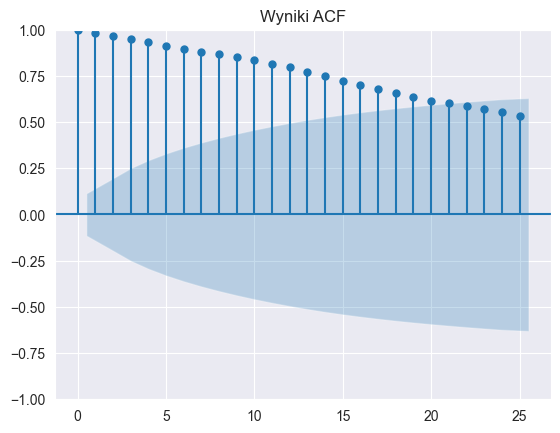

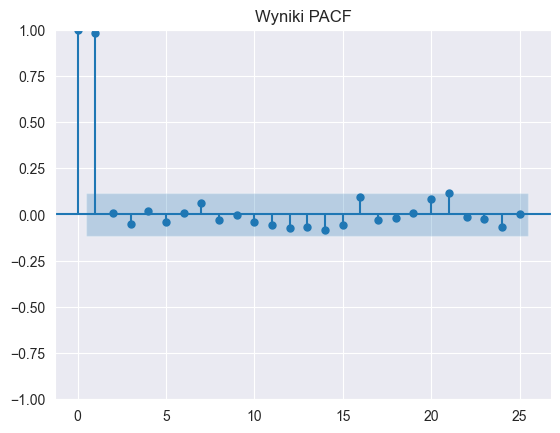

In [10]:
# Autokorelacja
plot_acf(df['Close/Last'])
plt.title("Wyniki ACF")
plt.show()

# Parcjalna autokorelacja
plot_pacf(df['Close/Last'])
plt.title("Wyniki PACF")
plt.show()

1. Autokorelacja (ACF)
Obserwacje:
Wysoka autokorelacja dla wielu lagów: Słupki są znaczące (przekraczają linie przedziału ufności) aż do około 15-20 lagów.
Stopniowy spadek autokorelacji: Wartości autokorelacji maleją w sposób wykładniczy, co wskazuje na obecność trendu w danych.
Wnioski:
Dane nie są stacjonarne, ponieważ autokorelacja zanika powoli. Trend w danych jest wyraźny, co jest typowe dla niestacjonarnych szeregów czasowych.
Konieczne będzie przeprowadzenie różnicowania danych (np. d=1 w modelu ARIMA), aby uzyskać stacjonarność.
2. Parcjalna Autokorelacja (PACF)
Obserwacje:
Pierwszy lag jest znaczący: Wyraźny wysoki słupek dla laga 1.
Brak istotnych słupków dla wyższych lagów: Kolejne słupki szybko zanikają i mieszczą się w granicach przedziału ufności.
Wnioski:
Wysoki pierwszy lag w PACF sugeruje, że dane mają komponent autoregresyjny (AR), czyli wcześniejsze wartości wpływają na bieżące. To wskazuje, że wartość parametru p w modelu ARIMA powinna wynosić 1.
Brak istotnych lagów powyżej 1 oznacza, że dalsze opóźnienia nie wnoszą istotnych informacji.
Ogólne Wnioski
Niestacjonarność: Zarówno ACF, jak i PACF wskazują, że dane zawierają trend i są niestacjonarne. Przed modelowaniem należy przeprowadzić różnicowanie.

In [11]:
df['Close_diff'] = df['Close/Last'].diff().dropna() # Roznicujemy wzgledem poprzedniego dnia

# Ponowny test Dickeya-Fullera
adf_test(df['Close_diff'].dropna())

ADF Statistic: -17.977935971069684
p-value: 2.7811889009633205e-30
Critical Values: {'1%': np.float64(-3.452867117291862), '5%': np.float64(-2.8714554160827745), '10%': np.float64(-2.5720532321867466)}
Odrzucamy hipotezę zerową: dane są stacjonarne


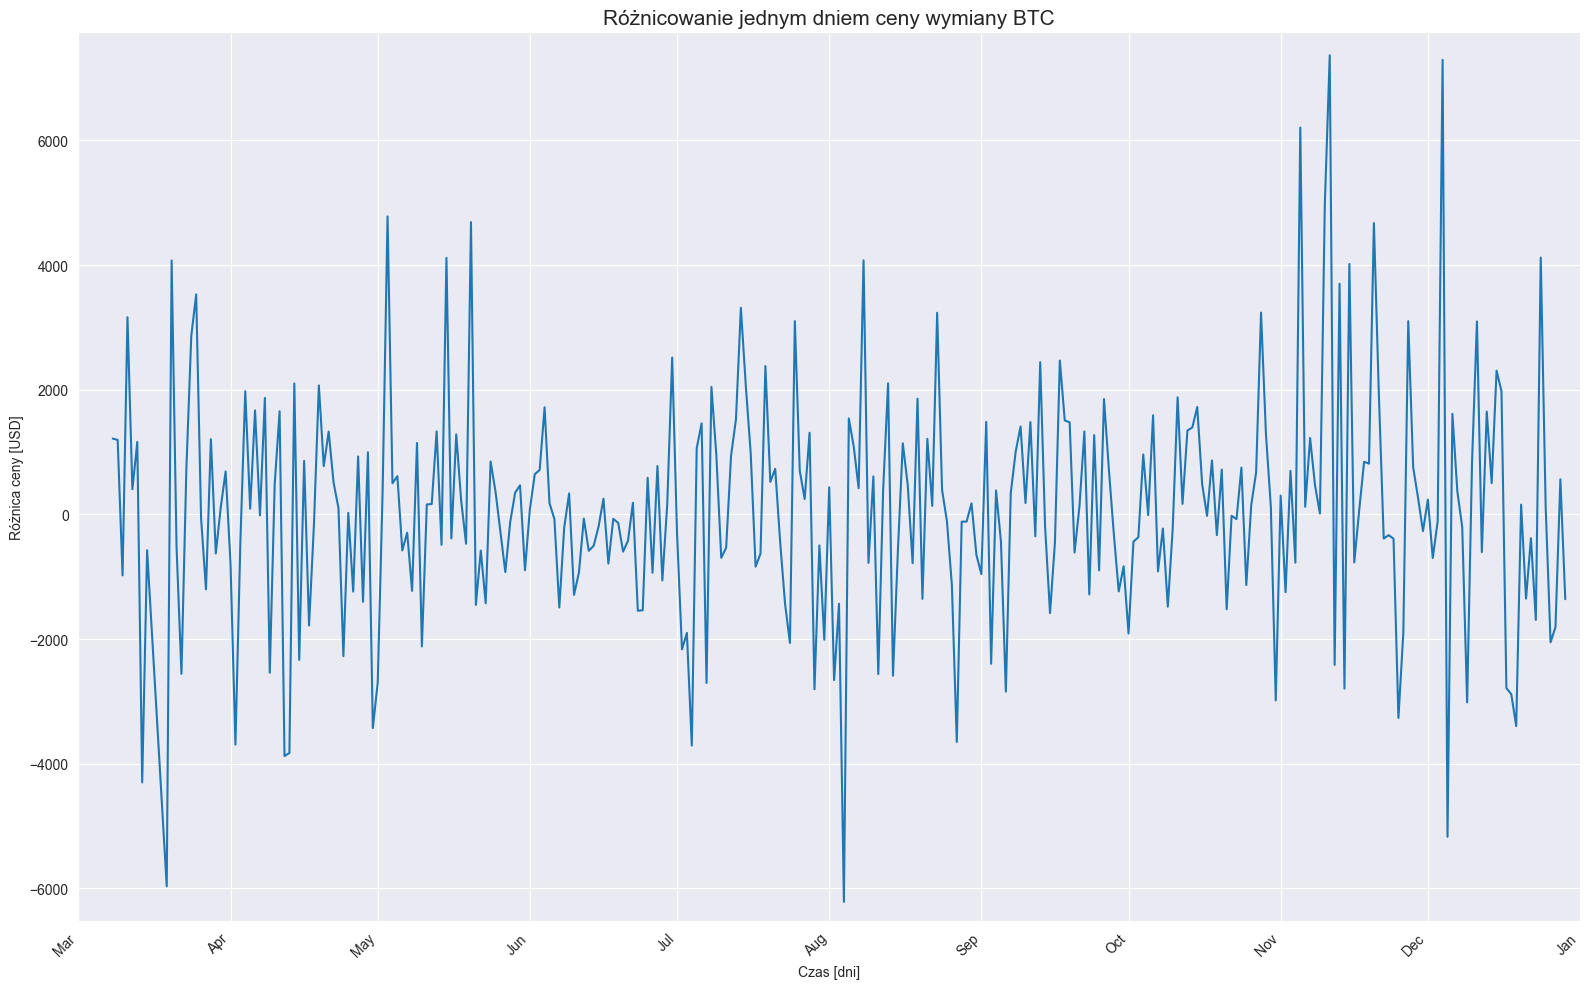

In [12]:
# Plot the data
fig, ax = plt.subplots(figsize=(16, 10))
df["Close_diff"].plot(ax=ax)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

ax.set_xlim(pd.Timestamp("2024-03-01"), pd.Timestamp("2025-01-01"))
ax.set_ylim(df["Close_diff"].min() * 1.05, df["Close_diff"].max() * 1.05)

# Customize plot
plt.title('Różnicowanie jednym dniem ceny wymiany BTC', fontsize=15)
plt.xlabel('Czas [dni]')
plt.ylabel('Różnica ceny [USD]')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

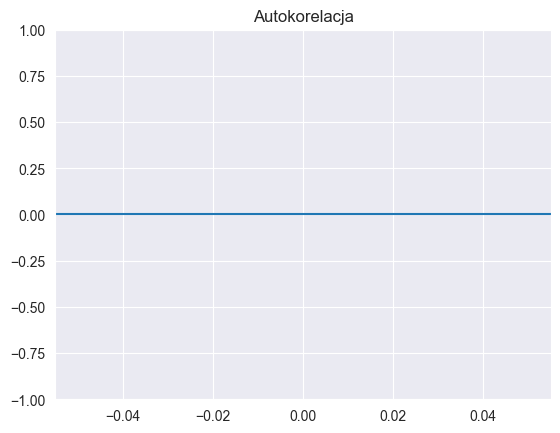

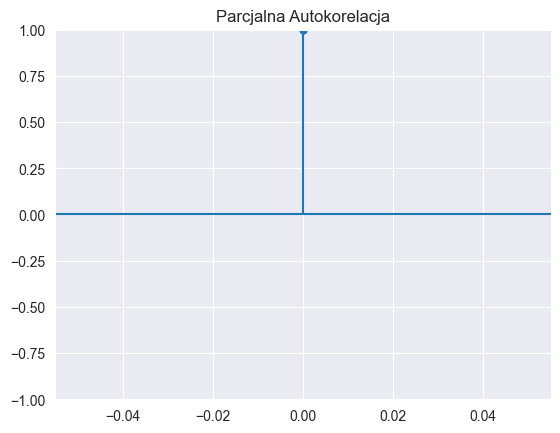

In [13]:
# Autokorelacja
plot_acf(df['Close_diff'])
plt.title("Autokorelacja")
plt.show()

# Parcjalna autokorelacja
plot_pacf(df['Close_diff'])
plt.title("Parcjalna Autokorelacja")
plt.show()